# Capstone project notebook for Coursera Data Science certification

In [3]:
import pandas as pd
import numpy as np

In [4]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [5]:
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
%matplotlib inline

In [36]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Step 1 - Remove unwanted features

In [37]:
df = df.drop(['OBJECTID','INCKEY','LOCATION','COLDETKEY','REPORTNO','STATUS','INTKEY','EXCEPTRSNCODE',
              'EXCEPTRSNDESC','SEVERITYDESC','INCDATE','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','ST_COLCODE',
              'ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','INCDTTM'],axis=1)
df.columns


Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'SEVERITYCODE.1', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR'],
      dtype='object')

In [39]:
df.shape

(194673, 19)

## Stpe 2 - Find missing values

In [8]:
def missing_function(df):
    missing_data = df.isnull()
    missing_data.head()

    for column in missing_data.columns.values.tolist():
        print(column)
        print(missing_data[column].value_counts())
        print(df[column].value_counts())
        print("")
        
missing_function(df)

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64
-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
              ... 
-122.322768      1
-122.288680      1
-122.405699      1
-122.323578      1
-122.343898      1
Name: X, Length: 23563, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64
47.708655    265
47.717173    254
47.604161    252
47.725036    239
47.579673    231
            ... 
47.556705      1
47.709101      1
47.513899      1
47.565438      1
47.563521      1
Name: Y, Length: 23839, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64
Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64
1    136485
2     58188
Name: SEVERITYCODE.1, dtype: int64

C

# Step 2 (continues) - Replace missing values

In [9]:
df.replace(r'^\s*$', np.nan, regex=True)
df.replace("Unknown", np.nan, inplace = True)
df.replace("Other", np.nan, inplace = True)

#removing columns values missing 
df = df.drop(["INATTENTIONIND","PEDROWNOTGRNT","SPEEDING"],axis=1)

#removing rows for columns with values missing 
df.dropna(subset=["X","Y","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND"], 
          axis=0, inplace=True)

#making sure all missing values are handled with
print(df.info())
missing_function(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143747 entries, 0 to 194672
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    143747 non-null  int64  
 1   X               143747 non-null  float64
 2   Y               143747 non-null  float64
 3   ADDRTYPE        143747 non-null  object 
 4   SEVERITYCODE.1  143747 non-null  int64  
 5   COLLISIONTYPE   143747 non-null  object 
 6   PERSONCOUNT     143747 non-null  int64  
 7   PEDCOUNT        143747 non-null  int64  
 8   PEDCYLCOUNT     143747 non-null  int64  
 9   VEHCOUNT        143747 non-null  int64  
 10  JUNCTIONTYPE    143747 non-null  object 
 11  UNDERINFL       143747 non-null  object 
 12  WEATHER         143747 non-null  object 
 13  ROADCOND        143747 non-null  object 
 14  LIGHTCOND       143747 non-null  object 
 15  HITPARKEDCAR    143747 non-null  object 
dtypes: float64(2), int64(6), object(8)
memory usage: 18.6+ M

# Unbalanced Dataset

In [10]:
df['SEVERITYCODE'].value_counts()

1    94821
2    48926
Name: SEVERITYCODE, dtype: int64

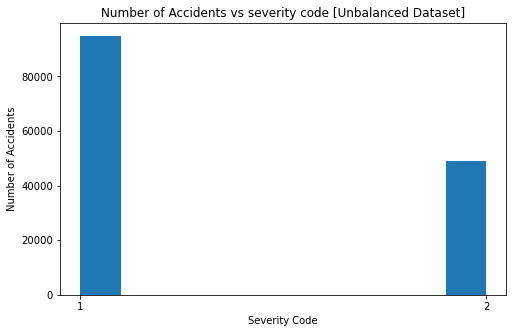

In [11]:
df['SEVERITYCODE'].plot(kind='hist', figsize=(8, 5), align='mid')

plt.title('Number of Accidents vs severity code [Unbalanced Dataset]') # add a title to the histogram
plt.ylabel('Number of Accidents') # add y-label
plt.xlabel('Severity Code') # add x-label
plt.xticks([1,2])

plt.show()

# Step 3 - Change from unbalanced to balanced dataset

In [12]:
#shuffling and creating a balanced dataset
df= df.sample(frac=1,random_state=0,replace=False)

# 1 - Put all severity code 2 class in a separate dataset.
df_scode2 = df.loc[df['SEVERITYCODE'] == 2]

# 2 - Randomly select 48926 observations from the severity code 1(majority class)
df_scode1 = df.loc[df['SEVERITYCODE'] == 1].sample(n=48926,random_state=42)

# 3 - concatenating datasets to get balanced dataset
df_balanced = pd.concat([df_scode1,df_scode2])
df_balanced = df_balanced.sample(frac=1,random_state=0,replace=False)

#Replacing 0 with N and 1 with Y as this column has mixed datatype values, making it consistent
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].replace(['0'],'N')
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].replace(['1'],'Y')

#checking if dataset balanced
#print(df_balanced.info())

print(df_balanced['SEVERITYCODE'].value_counts())
df_balanced.head()

2    48926
1    48926
Name: SEVERITYCODE, dtype: int64


,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
139054,2,-122.387539,47.678601,Block,2,Rear Ended,3,0,0,2,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
145014,2,-122.279315,47.522918,Block,2,Rear Ended,1,0,0,2,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
186440,1,-122.308280,47.547171,Block,1,Rear Ended,2,0,0,2,Mid-Block (but intersection related),N,Overcast,Wet,Dark - Street Lights On,N
191150,2,-122.282159,47.670328,Intersection,2,Angles,5,0,0,2,At Intersection (intersection related),N,Clear,Dry,Daylight,N
159954,2,-122.342367,47.656848,Intersection,2,Rear Ended,2,0,0,2,At Intersection (intersection related),N,Overcast,Wet,Daylight,N


### Step 4 - Label encoding to convert categorical variables to numerical variables for ML modelling

In [13]:
label_encoder = preprocessing.LabelEncoder()
df_balanced ['WEATHER']= label_encoder.fit_transform(df_balanced['WEATHER']) 
df_balanced ['ROADCOND']= label_encoder.fit_transform(df_balanced['ROADCOND']) 
df_balanced ['LIGHTCOND']= label_encoder.fit_transform(df_balanced['LIGHTCOND']) 
df_balanced.head()

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
139054,2,-122.387539,47.678601,Block,2,Rear Ended,3,0,0,2,Mid-Block (not related to intersection),N,1,0,5,N
145014,2,-122.279315,47.522918,Block,2,Rear Ended,1,0,0,2,Mid-Block (not related to intersection),N,1,0,5,N
186440,1,-122.308280,47.547171,Block,1,Rear Ended,2,0,0,2,Mid-Block (but intersection related),N,3,6,2,N
191150,2,-122.282159,47.670328,Intersection,2,Angles,5,0,0,2,At Intersection (intersection related),N,1,0,5,N
159954,2,-122.342367,47.656848,Intersection,2,Rear Ended,2,0,0,2,At Intersection (intersection related),N,3,6,5,N


### Plotting Balance Dataset

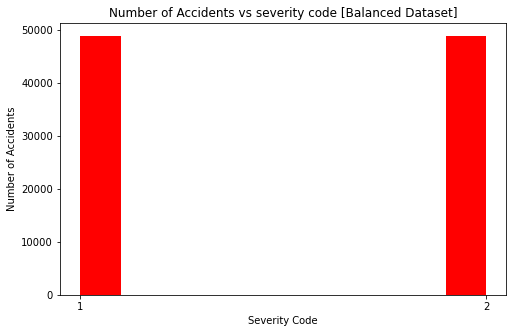

In [15]:
df_balanced['SEVERITYCODE'].plot(kind='hist', figsize=(8, 5), align='mid',color='red')

plt.title('Number of Accidents vs severity code [Balanced Dataset]') # add a title to the histogram
plt.ylabel('Number of Accidents') # add y-label
plt.xlabel('Severity Code') # add x-label
plt.xticks([1,2])

plt.show()

### Step 5 - Only keeping required columns i.e. Weather, Road condition and Light condition

In [19]:
X=df_balanced[['WEATHER','ROADCOND','LIGHTCOND']]
X[0:5]

,WEATHER,ROADCOND,LIGHTCOND
139054,1,0,5
145014,1,0,5
186440,3,6,2
191150,1,0,5
159954,3,6,5


In [20]:
Y = df_balanced['SEVERITYCODE'].values
Y[0:5]
#Y.shape

array([2, 2, 1, 2, 2])

### Data normalization

In [21]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


array([[-0.67561709, -0.61122939,  0.57402479],
       [-0.67561709, -0.61122939,  0.57402479],
       [ 0.55559378,  1.6495346 , -1.56408135],
       [-0.67561709, -0.61122939,  0.57402479],
       [ 0.55559378,  1.6495346 ,  0.57402479]])

## Preparing Test (30%) and Train (70%) data set

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(68496, 3) (68496,)
(29356, 3) (29356,)


 # Introducing Machine Learning Models

### Model 1 - Logistic Regression

In [23]:
#LOGISTIC REGRESSION
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,Y_train)
lr_predictions = lr.predict(X_test)

lr_cm = confusion_matrix(Y_test,lr_predictions)
print(lr_cm,'\n')

lr_cr = classification_report(Y_test,lr_predictions)
print(lr_cr,'\n')

acc = accuracy_score(Y_test,lr_predictions)
print(acc,'\n')
accDict = {}
accDict['LR'] = acc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 4299 10444]
 [ 3848 10765]] 

              precision    recall  f1-score   support

           1       0.53      0.29      0.38     14743
           2       0.51      0.74      0.60     14613

   micro avg       0.51      0.51      0.51     29356
   macro avg       0.52      0.51      0.49     29356
weighted avg       0.52      0.51      0.49     29356
 

0.5131489303719853 



### Model 2 - K-Nearest Neighbour

In [29]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.5141368 , 0.51362583, 0.51440932, 0.51406867, 0.50463278,
       0.50487124, 0.50316801, 0.4967298 , 0.49696825])

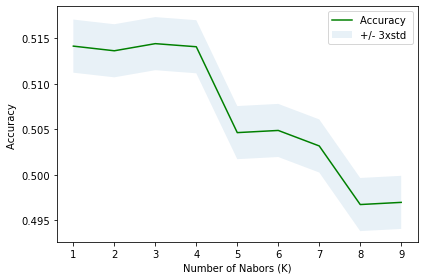

In [30]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [31]:
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
neigh
knn_predictions = neigh.predict(X_test)

knn_cm = confusion_matrix(Y_test,knn_predictions)
print(knn_cm,'\n')

knn_cr = classification_report(Y_test,knn_predictions)
print(knn_cr,'\n')

acc = accuracy_score(Y_test,knn_predictions)
print(acc,'\n')
accDict['KNN'] = acc

[[ 4784  9959]
 [ 4306 10307]] 

              precision    recall  f1-score   support

           1       0.53      0.32      0.40     14743
           2       0.51      0.71      0.59     14613

   micro avg       0.51      0.51      0.51     29356
   macro avg       0.52      0.51      0.50     29356
weighted avg       0.52      0.51      0.50     29356
 

0.5140686742062951 



### Model 3 - Decision Trees Classifier

In [32]:
#DECISION TREE CLASSIFIER
dtc = DecisionTreeClassifier()
params = {'criterion':['gini', 'entropy'], 
          'random_state':[0]}
dtc1 = GridSearchCV(dtc, param_grid=params)
dtc1.fit(X_train,Y_train)
dtc_predictions = dtc1.predict(X_test)
print('Best Hyperparameter DTC : ',dtc1.best_params_)

dtc_cm=confusion_matrix(Y_test,dtc_predictions)
print(dtc_cm,'\n')

dtc_cr = classification_report(Y_test,dtc_predictions)
print(dtc_cr,'\n')

acc = accuracy_score(Y_test,dtc_predictions)
print(acc,'\n')
accDict['DTC'] = acc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyperparameter DTC :  {'criterion': 'gini', 'random_state': 0}
[[ 3677 11066]
 [ 3095 11518]] 

              precision    recall  f1-score   support

           1       0.54      0.25      0.34     14743
           2       0.51      0.79      0.62     14613

   micro avg       0.52      0.52      0.52     29356
   macro avg       0.53      0.52      0.48     29356
weighted avg       0.53      0.52      0.48     29356
 

0.5176113911977108 

